# 单层感知机

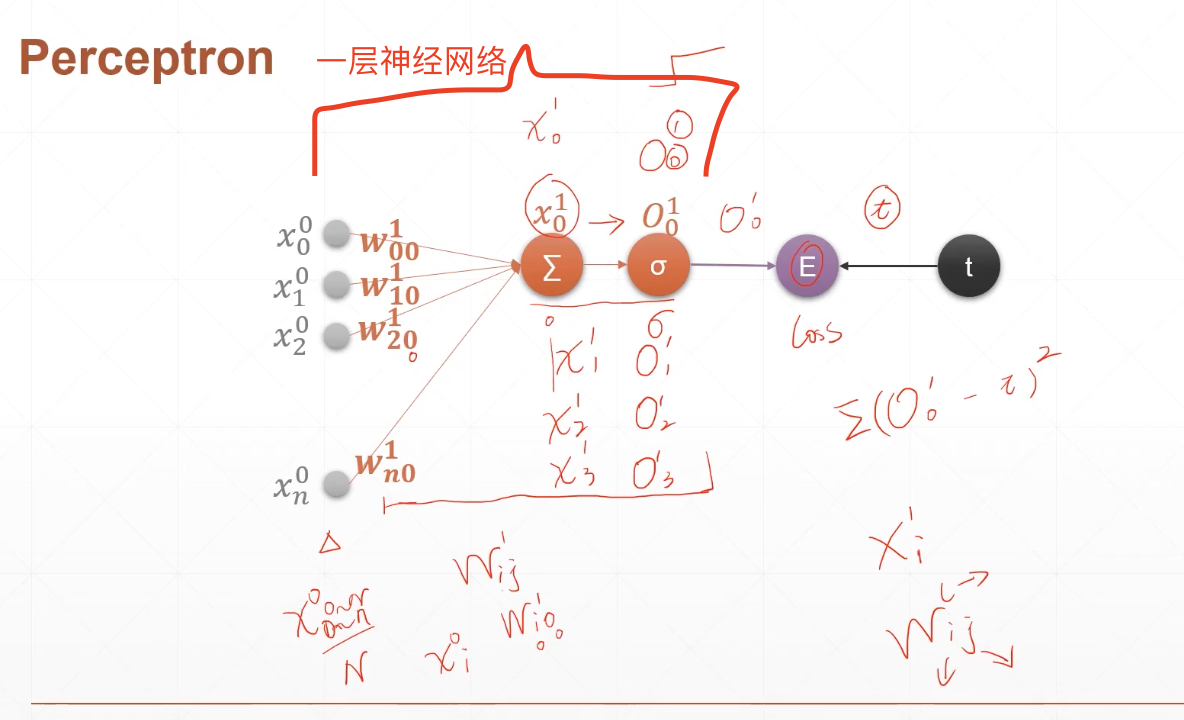
- $\sigma=sigmoid={1\over 1+e^{-z}}$
- $\sigma ^{'} = \sigma (1-\sigma )$

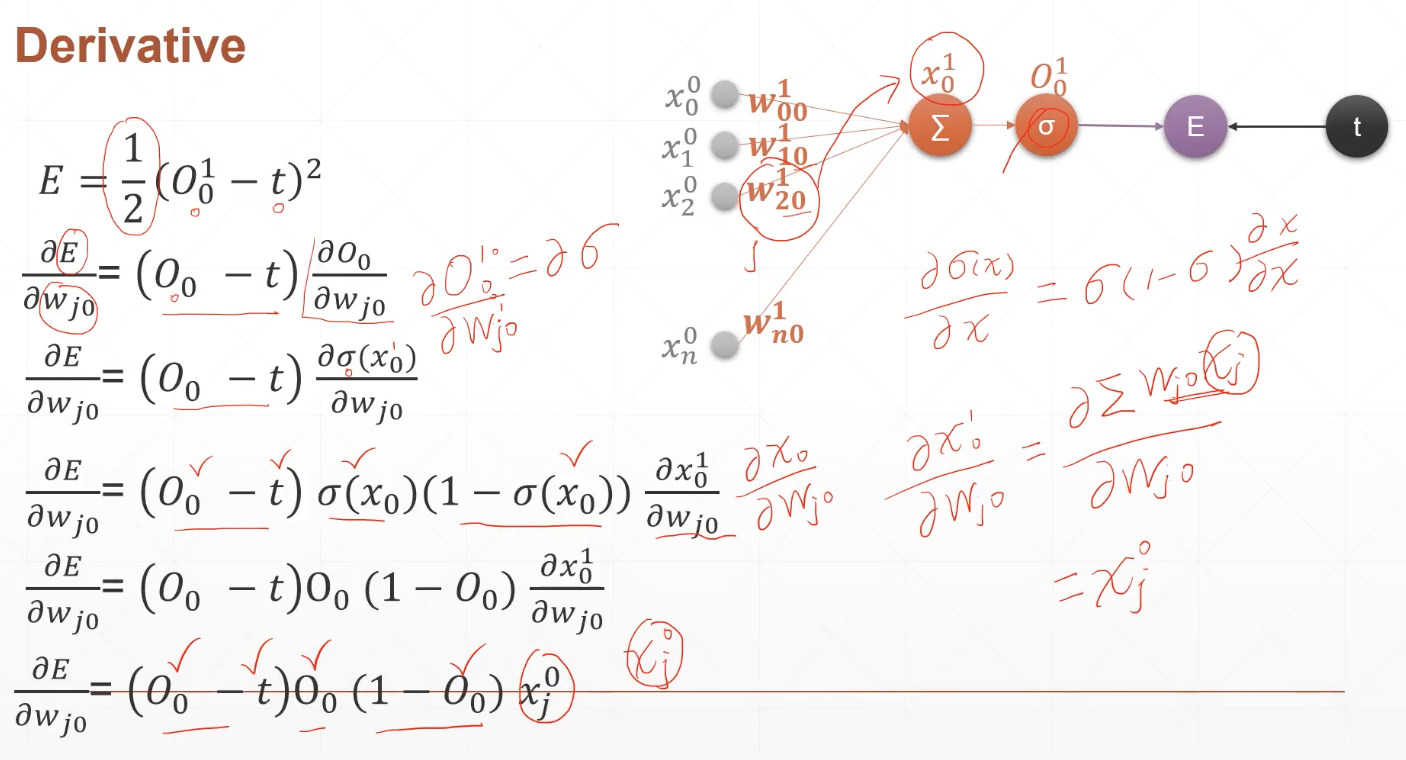

In [6]:
import torch
from torch.nn import functional as F
x = torch.randn(1, 10)
w = torch.randn(1, 10).requires_grad_(True)
o = torch.sigmoid(x@w.t())
loss = F.mse_loss(torch.ones(1,1), o)
loss.backward()
w.grad

tensor([[ 0.3578,  0.1879, -0.1232,  0.0660,  0.0169, -0.1385, -0.7854, -0.2341,
         -0.2698,  0.4126]])

# 多输出感知机

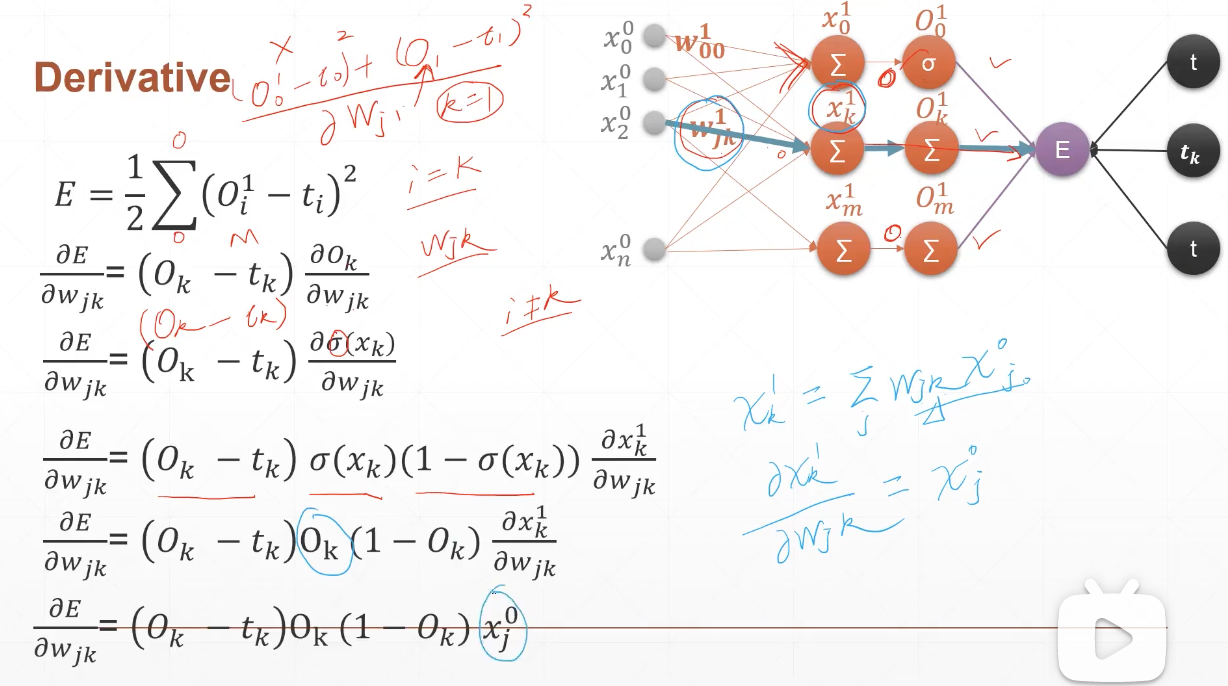

In [10]:
x = torch.randn(1, 10)
w = torch.randn(2, 10).requires_grad_(True)
y_pred = torch.sigmoid(x@w.t())
loss = F.mse_loss(torch.ones(1,1), y_pred) # 广播机制
loss.backward()
w.grad

<ipython-input-10-d7ac01d97966>:4: UserWarning: Using a target size (torch.Size([1, 2])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = F.mse_loss(torch.ones(1,1), y_pred) # 广播机制


tensor([[-0.1356,  0.0031, -0.0815, -0.0174, -0.0560, -0.0889, -0.0591,  0.0784,
          0.0096, -0.1562],
        [-0.0125,  0.0003, -0.0075, -0.0016, -0.0052, -0.0082, -0.0054,  0.0072,
          0.0009, -0.0144]])

# 链式法则

In [15]:
x = torch.tensor(1.)
w1 = torch.tensor(2.).requires_grad_(True)
b1 = torch.tensor(1.)
w2 = torch.tensor(2.).requires_grad_(True)
b2 = torch.tensor(1.)
y1 = x*w1 +b1
y2 = y1*w2 + b2
dy2_dy1 = torch.autograd.grad(y2, [y1], retain_graph=True)[0]
dy1_dw1 = torch.autograd.grad(y1, [w1], retain_graph=True)[0]
dy2_dw1 = torch.autograd.grad(y2, [w1], retain_graph=True)[0]
dy2_dy1*dy1_dw1

tensor(2.)